# __Import Packages__

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight') 

# __Data Overview__

In [2]:
raw_data = pd.read_csv('./weatherHistory.csv')

In [3]:
raw_data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [4]:
raw_data.tail()

Formatted Date        Summary Precip Type  \
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.

In [5]:
raw_data.shape

(96453, 12)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


- This Datset Contains 96543 rows and 12 columns
- Categorical variables have data type object.

- Numerical variables have data type float64

In [7]:
raw_data.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

# __Data Preperation__

In [8]:
data = raw_data.copy(deep=True)

In [9]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [10]:
data.columns = data.columns.str.replace(' ', '_')

In [11]:
data.drop(columns='Loud_Cover', inplace=True)

In [12]:
data['Formatted_Date'] = pd.to_datetime(data['Formatted_Date'], format='%Y-%m-%d', utc=True)

In [13]:
data.set_index('Formatted_Date', inplace=True)

# __Exploratory Data Analysis__

## __Handling Missing Values__

In [14]:
data.isnull().sum()

Summary                       0
Precip_Type                 517
Temperature_(C)               0
Apparent_Temperature_(C)      0
Humidity                      0
Wind_Speed_(km/h)             0
Wind_Bearing_(degrees)        0
Visibility_(km)               0
Pressure_(millibars)          0
Daily_Summary                 0
dtype: int64

In [15]:
data['Precip_Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [16]:
missing_df = data[data.isnull().any(axis=1)]
missing_df.head()

Summary Precip_Type  Temperature_(C)  \
Formatted_Date                                                          
2012-04-11 14:00:00+00:00  Mostly Cloudy         NaN        19.016667   
2012-04-11 16:00:00+00:00  Mostly Cloudy         NaN        17.850000   
2012-04-11 17:00:00+00:00  Mostly Cloudy         NaN        16.322222   
2012-04-11 19:00:00+00:00  Mostly Cloudy         NaN        12.566667   
2012-04-11 20:00:00+00:00  Mostly Cloudy         NaN        12.927778   

                           Apparent_Temperature_(C)  Humidity  \
Formatted_Date                                                  
2012-04-11 14:00:00+00:00                 19.016667      0.26   
2012-04-11 16:00:00+00:00                 17.850000      0.28   
2012-04-11 17:00:00+00:00                 16.322222      0.32   
2012-04-11 19:00:00+00:00                 12.566667      0.43   
2012-04-11 20:00:00+00:00                 12.927778      0.47   

                           Wind_Speed_(km/h)  Wind_Bearing_(degrees)  \
Formatted_Date                                                         
2012-04-11 14:00:00+00:00            14.8764                   163.0   
2012-04-11 16:00:00+00:00            13.7977                   169.0   
2012-04-11 17:00:00+00:00            10.8192                   151.0   
2012-04-11 19:00:00+00:00             9.0160                   159.0   
2012-04-11 20:00:00+00:00            17.6295                   197.0   

                           Visibility_(km)  Pressure_(millibars)  \
Formatted_Date                                                     
2012-04-11 14:00:00+00:00            9.982               1002.40   
2012-04-11 16:00:00+00:00            9.982               1001.79   
2012-04-11 17:00:00+00:00            9.982               1001.60   
2012-04-11 19:00:00+00:00            9.982               1001.92   
2012-04-11 20:00:00+00:00           16.100               1002.20   

                                        Daily_Summary  
Formatted_Date                                         
2012-04-11 14:00:00+00:00  Mostly cloudy until night.  
2012-04-11 16:00:00+00:00  Mostly cloudy until night.  
2012-04-11 17:00:00+00:00  Mostly cloudy until night.  
2012-04-11 19:00:00+00:00  Mostly cloudy until night.  
2012-04-11 20:00:00+00:00  Mostly cloudy until night.

In [17]:
missing_df.min()

Summary                                         Clear
Precip_Type                                      None
Temperature_(C)                              1.255556
Apparent_Temperature_(C)                    -0.822222
Humidity                                         0.26
Wind_Speed_(km/h)                              1.0787
Wind_Bearing_(degrees)                            0.0
Visibility_(km)                                   0.0
Pressure_(millibars)                           993.94
Daily_Summary               Clear throughout the day.
dtype: object

In [18]:
data.groupby(by='Precip_Type').min()

Summary  Temperature_(C)  Apparent_Temperature_(C)  Humidity  \
Precip_Type                                                                
rain         Breezy         0.005556                 -7.550000       0.0   
snow         Breezy       -21.822222                -27.716667       0.0   

             Wind_Speed_(km/h)  Wind_Bearing_(degrees)  Visibility_(km)  \
Precip_Type                                                               
rain                       0.0                     0.0              0.0   
snow                       0.0                     0.0              0.0   

             Pressure_(millibars)                              Daily_Summary  
Precip_Type                                                                   
rain                          0.0  Breezy and foggy starting in the evening.  
snow                          0.0  Breezy and foggy starting in the evening.

In [19]:
data['Precip_Type'].fillna('rain', inplace=True)

In [20]:
data.isnull().sum()

Summary                     0
Precip_Type                 0
Temperature_(C)             0
Apparent_Temperature_(C)    0
Humidity                    0
Wind_Speed_(km/h)           0
Wind_Bearing_(degrees)      0
Visibility_(km)             0
Pressure_(millibars)        0
Daily_Summary               0
dtype: int64

### Drop Unwanted Columns

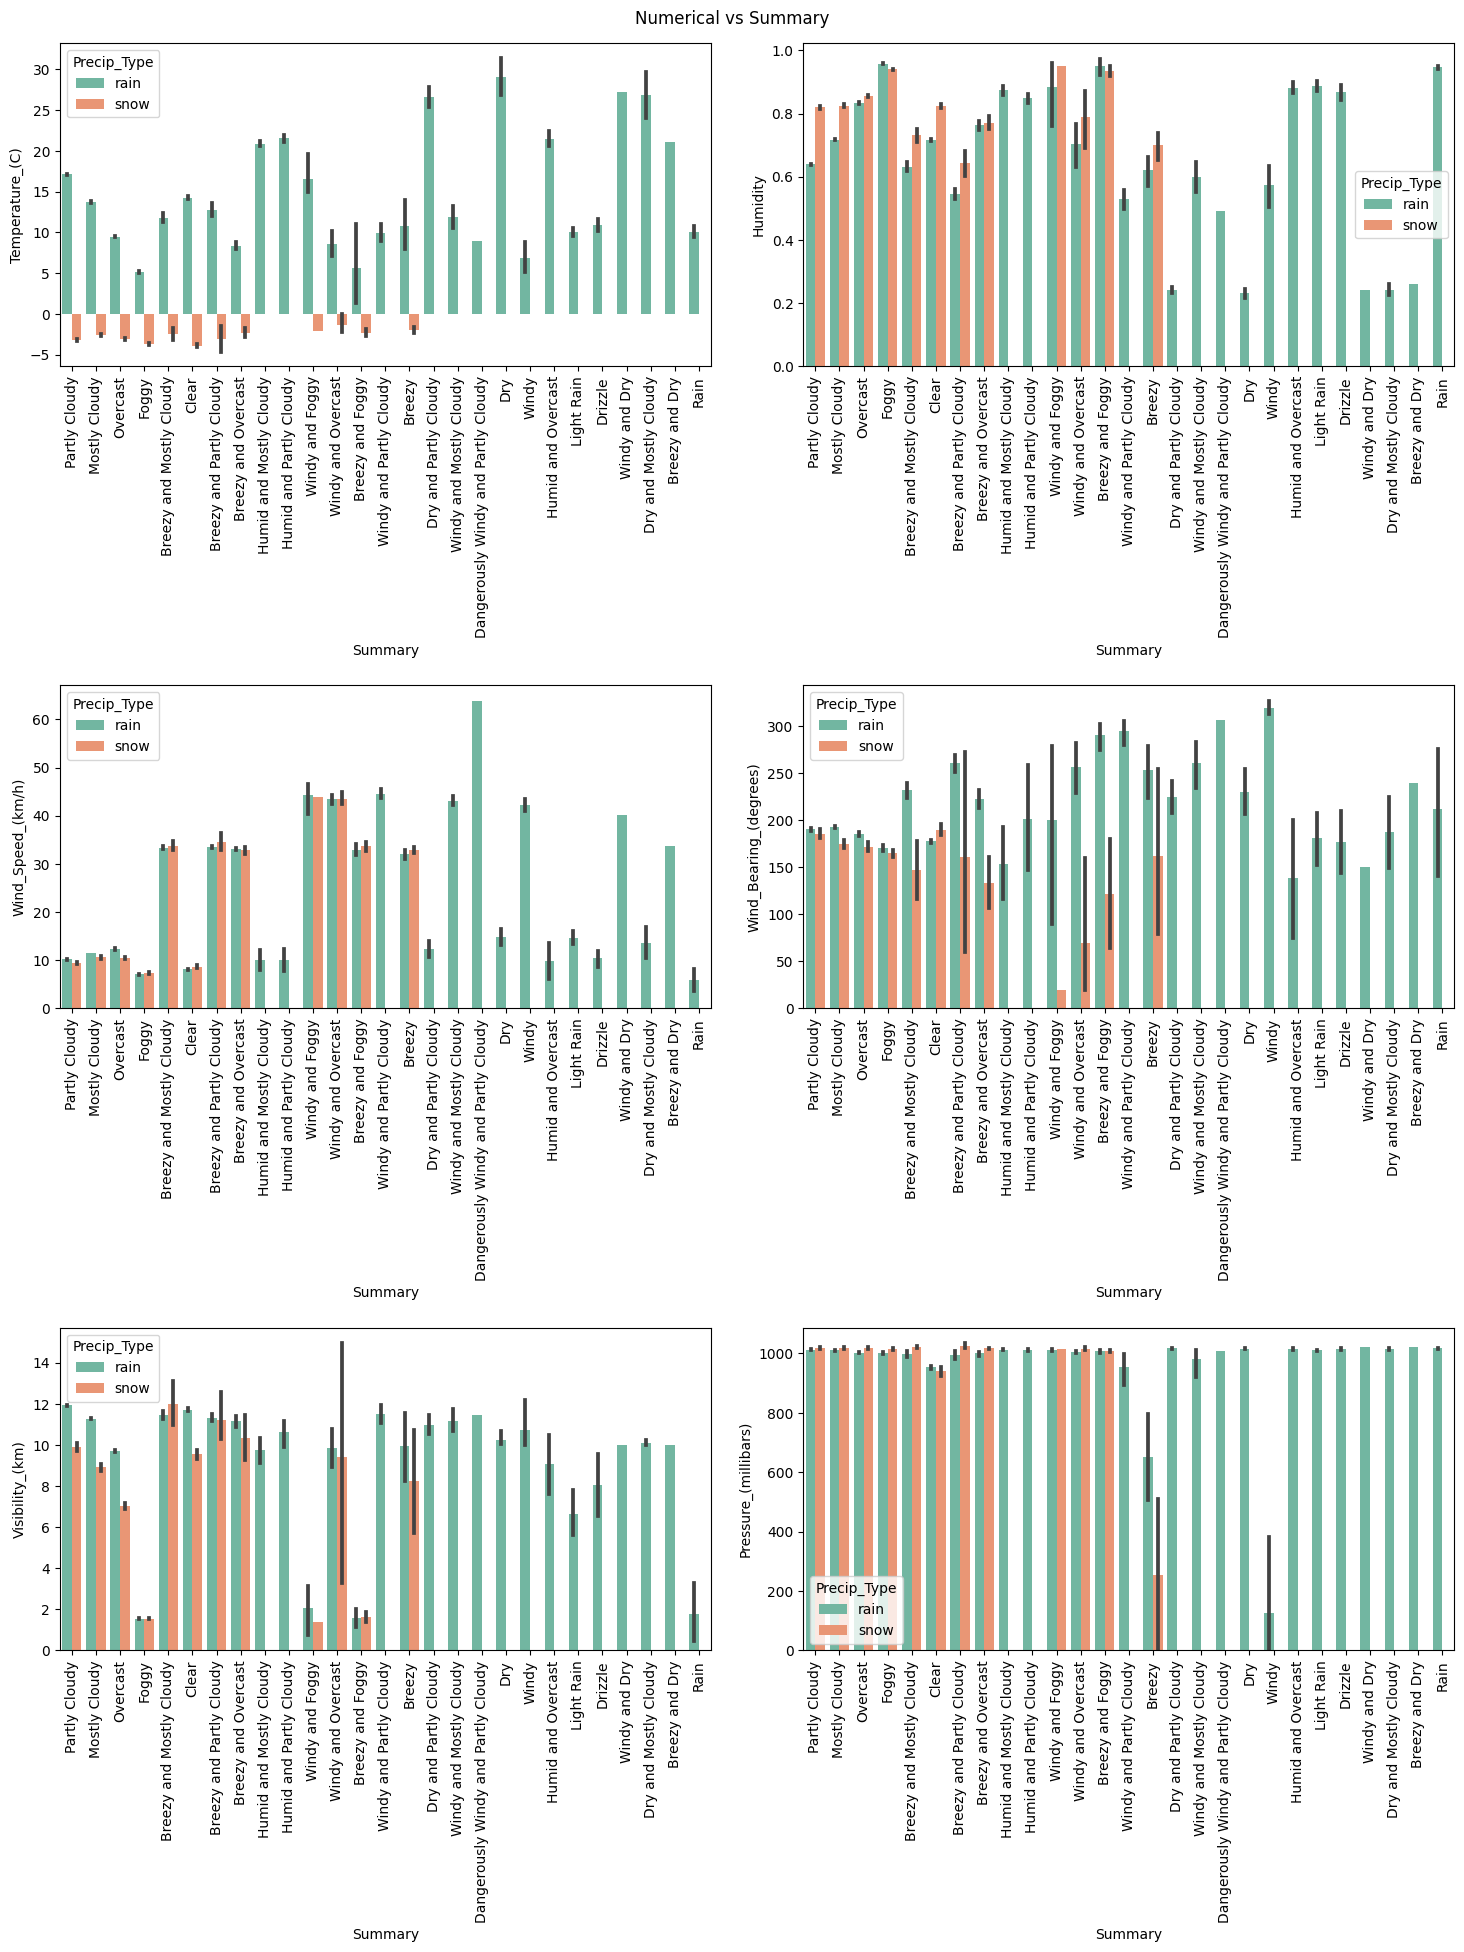

In [21]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 20))
axes = axes.flat
number_cols = ['Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 
               'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Pressure_(millibars)']
for index, column in enumerate(number_cols):
    sns.barplot(
        data=data, 
        x='Summary', 
        y=column, 
        hue='Precip_Type', 
        palette='Set2',
        ax=axes[index]

    )
    plt.setp(axes[index].get_xticklabels(), rotation=90)
plt.suptitle('Numerical vs Summary')
plt.tight_layout(pad=2)
plt.show()

### Resampling the Data

##### Downsampling: 
1. Downsampling is the process of reducing the frequency of the time series data by aggregating or summarizing the data over longer time intervals. 
- For example, you can downsample daily data to weekly data by computing the mean or median of the daily data over each week. Downsampling can be useful for reducing the amount of data and noise in the time series and can also speed up computational time.

##### Upsampling: 
1. Upsampling is the process of increasing the frequency of the time series data by interpolating the data over shorter time intervals.
- For example, you can upsample weekly data to daily data by interpolating or filling in missing values for the daily data using the values from the weekly data. Upsampling can be useful for capturing more detailed patterns in the time series data or for aligning different time series data with different frequencies.

##### Code for resampling the data:
`df.resample(‘desired need(frequency)’).aggregate_function()`

frequency ('S' : Seconds, 'T' : Minute, 'H' : Hour, 'D' : Day, 'M' : Month, 'Q' : Quarter Year, 'Y' : Year) 

In [22]:
data = data.resample('D').apply(lambda x :x.mode()[0])

## __Univariate Analysis__

In [23]:
data.nunique()

Summary                       14
Precip_Type                    2
Temperature_(C)             1849
Apparent_Temperature_(C)    2386
Humidity                      86
Wind_Speed_(km/h)            865
Wind_Bearing_(degrees)       305
Visibility_(km)              261
Pressure_(millibars)        2049
Daily_Summary                214
dtype: int64

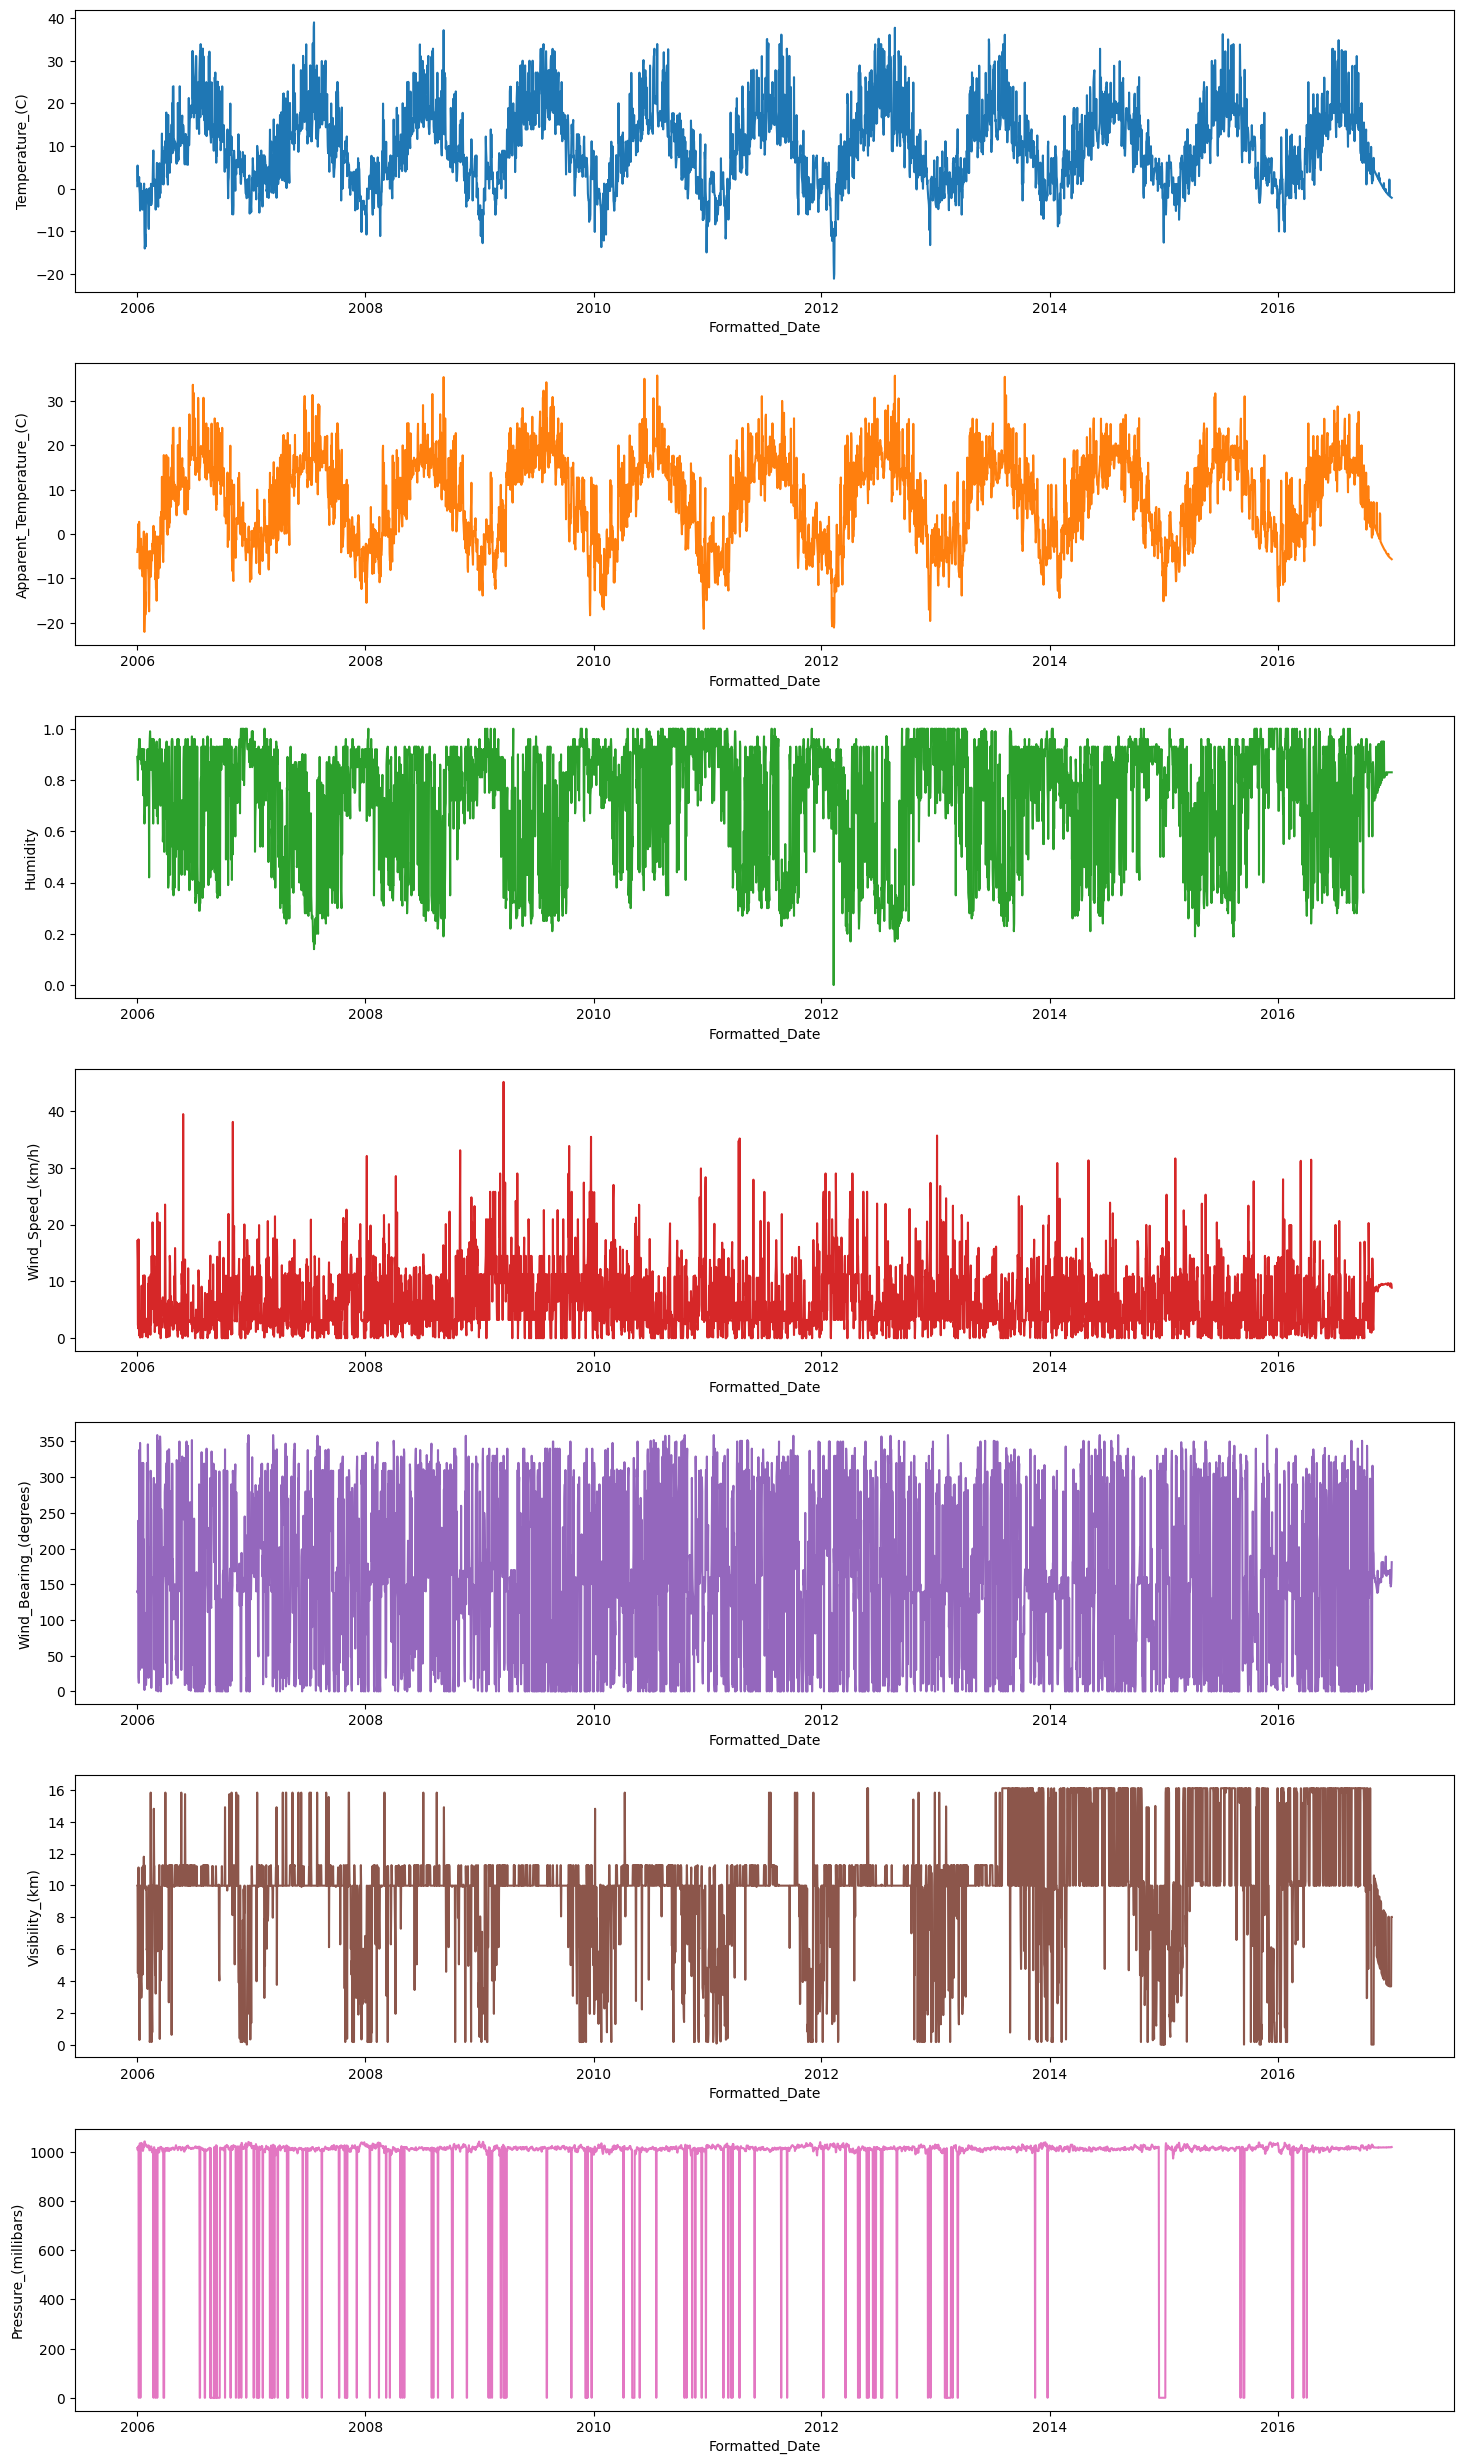

In [24]:
fig, axes = plt.subplots(ncols=1, nrows=7, figsize=(15, 25))
axes = axes.flat
number_cols = ['Temperature_(C)', 'Apparent_Temperature_(C)', 'Humidity',
       'Wind_Speed_(km/h)', 'Wind_Bearing_(degrees)', 'Visibility_(km)',
       'Pressure_(millibars)']
colors = ['red', 'green', 'pink']
for index, column in enumerate(number_cols):
    sns.lineplot(
        data[column].shift(1),
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]

    )

plt.tight_layout(pad=2)
plt.show()

### __Target Distribution__

In [25]:
weather_summary = data['Summary'].value_counts().reset_index()
weather_summary.columns = ['Weather', 'Counts']
weather_summary

Weather  Counts
0              Partly Cloudy    1463
1              Mostly Cloudy    1291
2                   Overcast     670
3                      Clear     298
4                      Foggy     267
5        Breezy and Overcast      13
6   Breezy and Mostly Cloudy       6
7   Breezy and Partly Cloudy       3
8    Windy and Partly Cloudy       2
9                 Light Rain       2
10          Breezy and Foggy       1
11                    Breezy       1
12                   Drizzle       1
13                      Rain       1

### __Continuos Numerical Feature Distribution__

In [26]:
data.select_dtypes(include=np.number).columns

Index(['Temperature_(C)', 'Apparent_Temperature_(C)', 'Humidity',
       'Wind_Speed_(km/h)', 'Wind_Bearing_(degrees)', 'Visibility_(km)',
       'Pressure_(millibars)'],
      dtype='object')

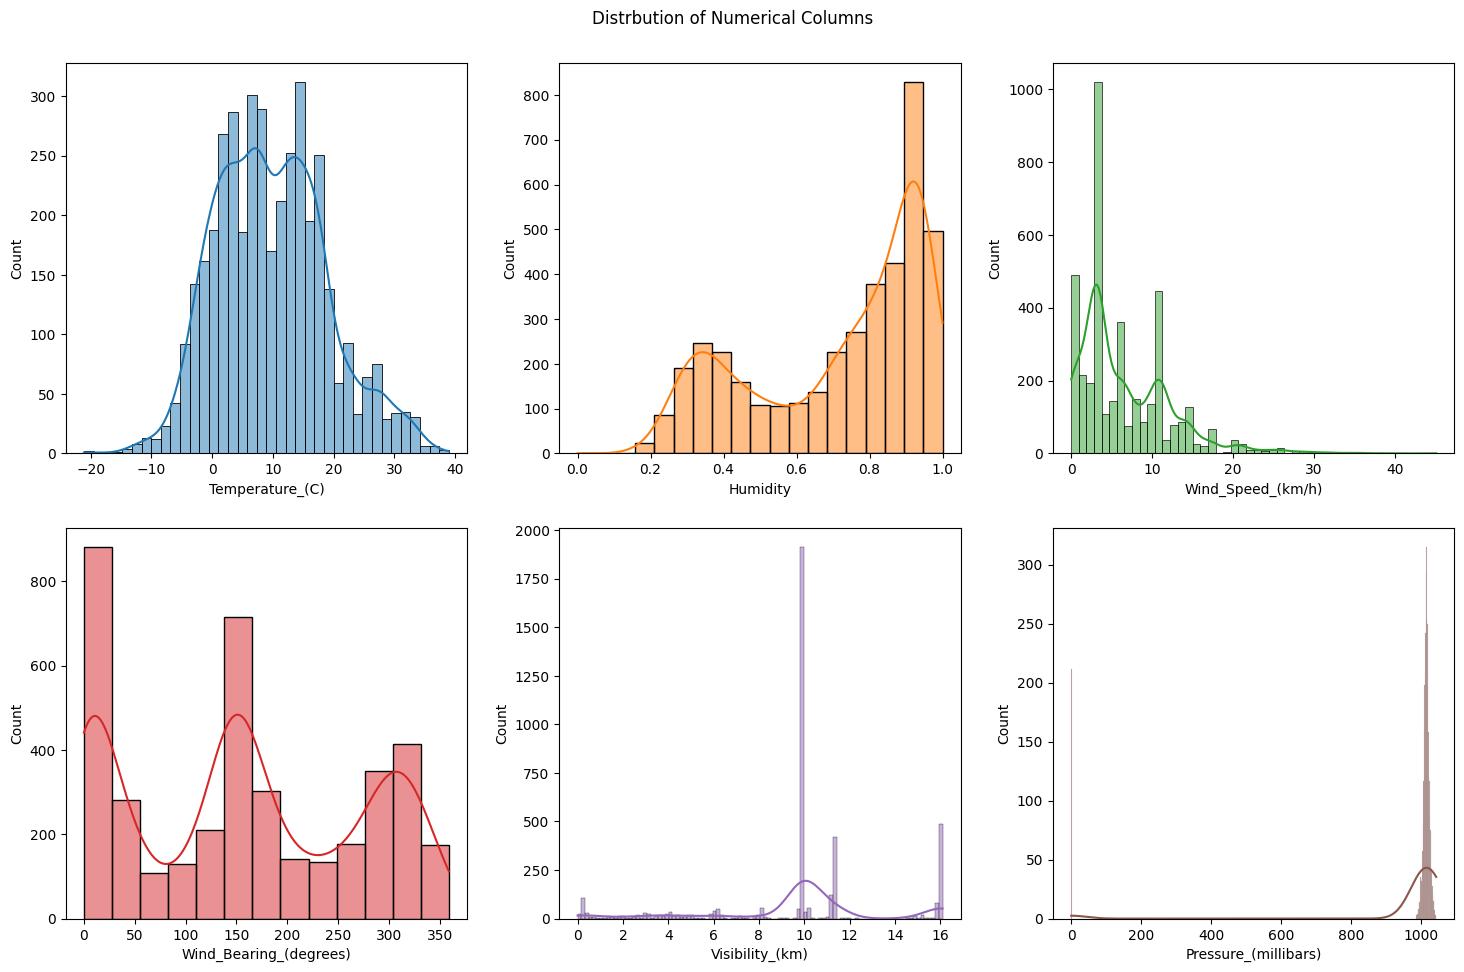

In [27]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
axes = axes.flat
number_cols = ['Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 
               'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Pressure_(millibars)']
for index, column in enumerate(number_cols):
    sns.histplot(
        data=data, 
        x=column,
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]

    )
#     plt.setp(axes[index].get_xticklabels(), rotation=90)
plt.suptitle('Distrbution of Numerical Columns')
plt.tight_layout(pad=2)
plt.show()

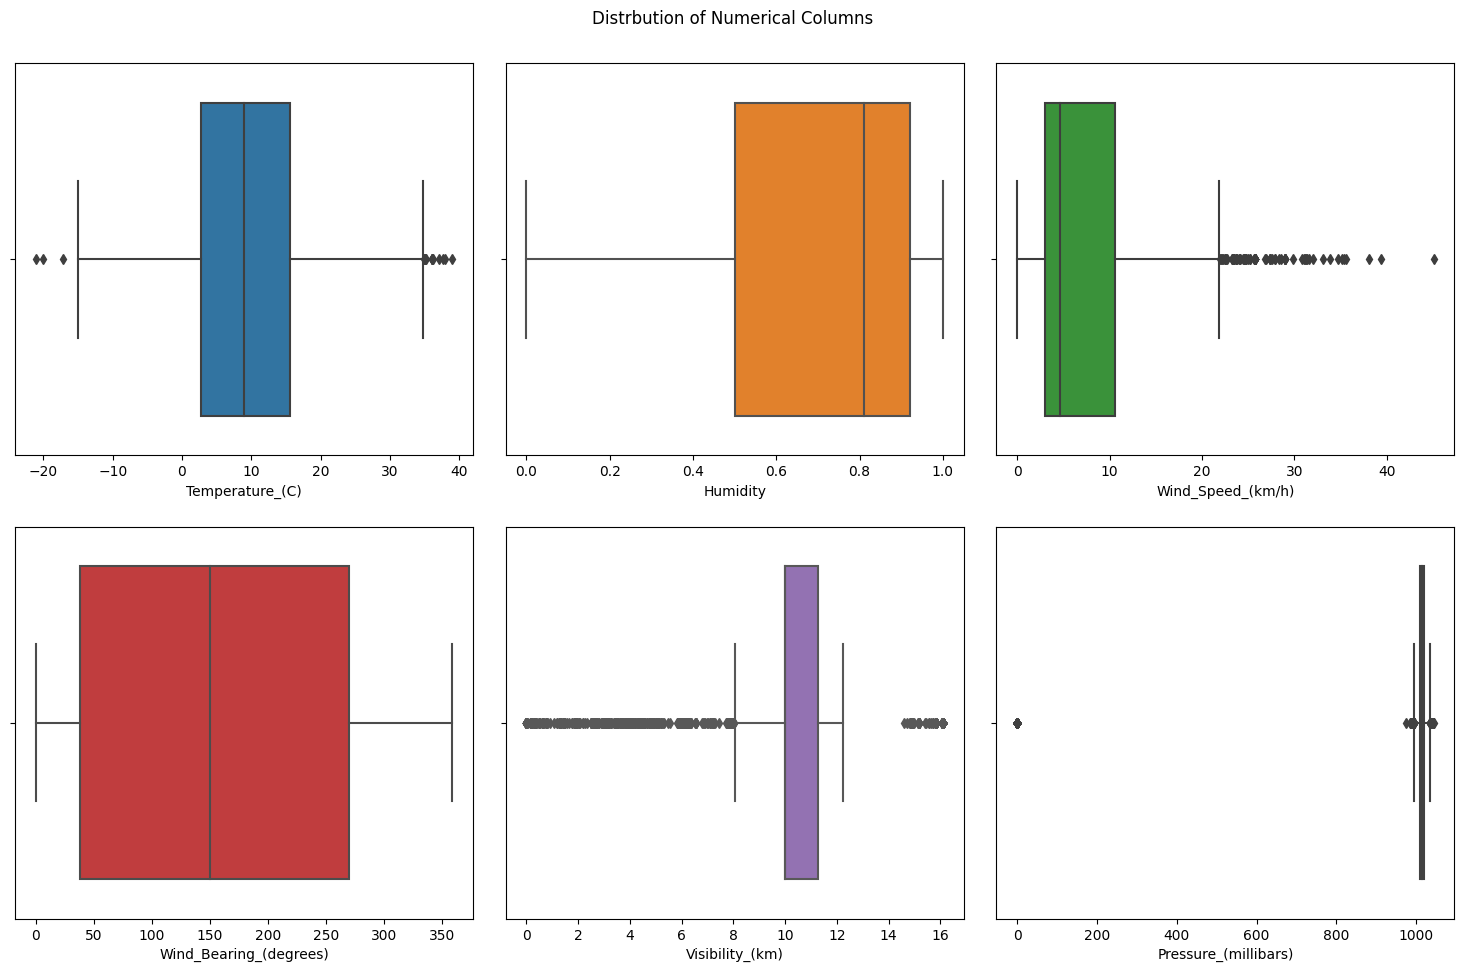

In [28]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
axes = axes.flat
number_cols = ['Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 
               'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Pressure_(millibars)']
for index, column in enumerate(number_cols):
    sns.boxplot(
        data=data, 
        x=column,
#         kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]

    )
#     plt.setp(axes[index].get_xticklabels(), rotation=90)
plt.suptitle('Distrbution of Numerical Columns')
plt.tight_layout(pad=2)
plt.show()

## __Bivariate Analysis__

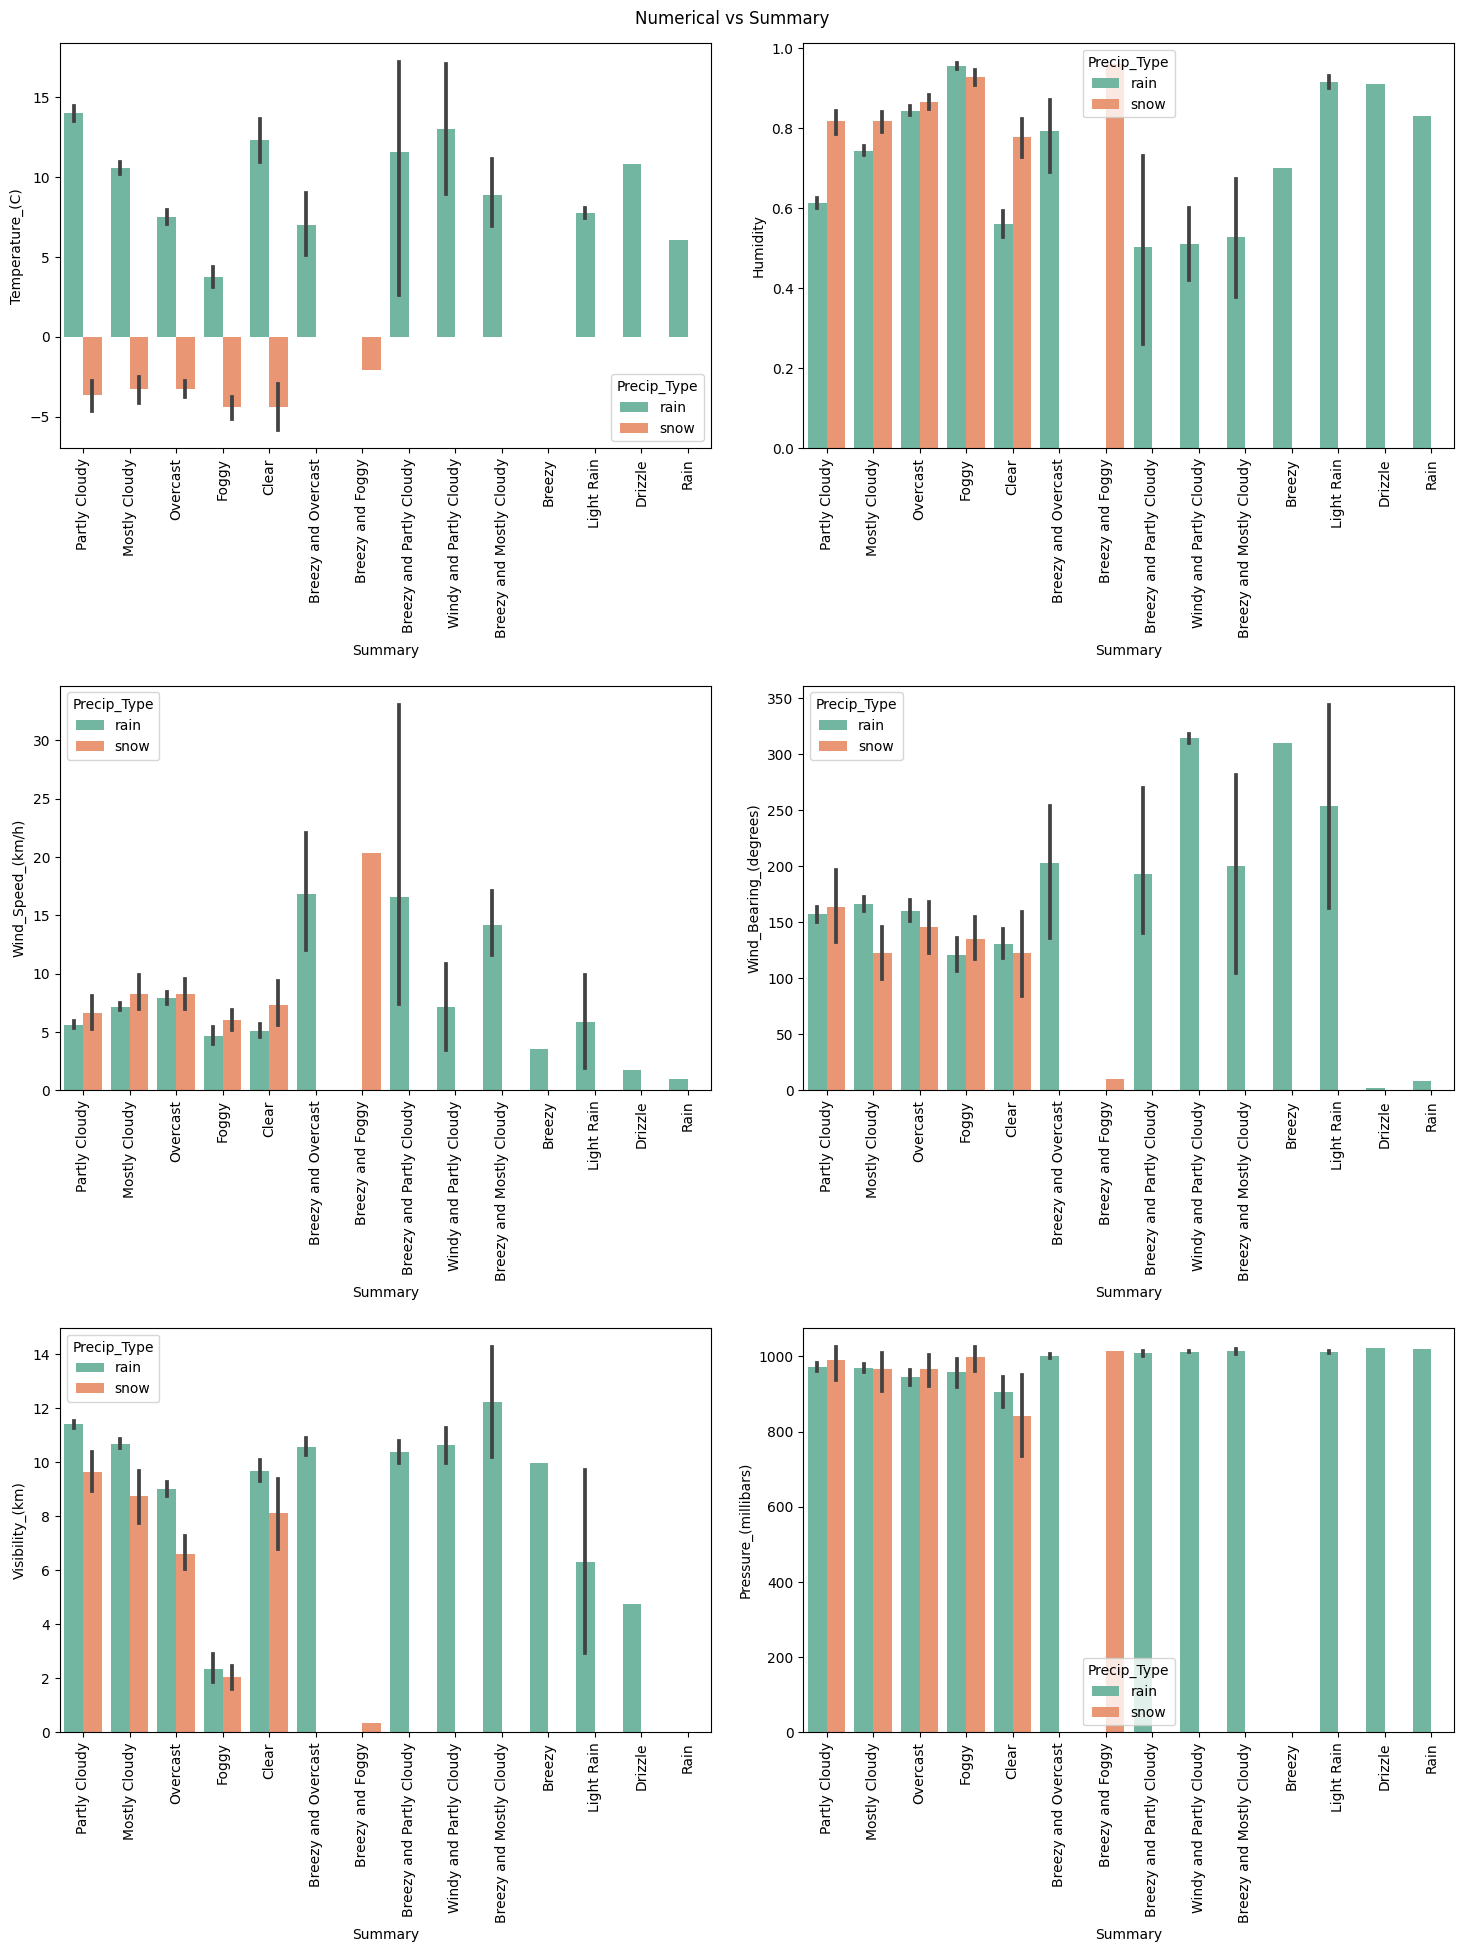

In [29]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 20))
axes = axes.flat
number_cols = ['Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 
               'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Pressure_(millibars)']
for index, column in enumerate(number_cols):
    sns.barplot(
        data=data, 
        x='Summary', 
        y=column, 
        hue='Precip_Type', 
        palette='Set2',
        ax=axes[index]

    )
    plt.setp(axes[index].get_xticklabels(), rotation=90)
plt.suptitle('Numerical vs Summary')
plt.tight_layout(pad=2)
plt.show()

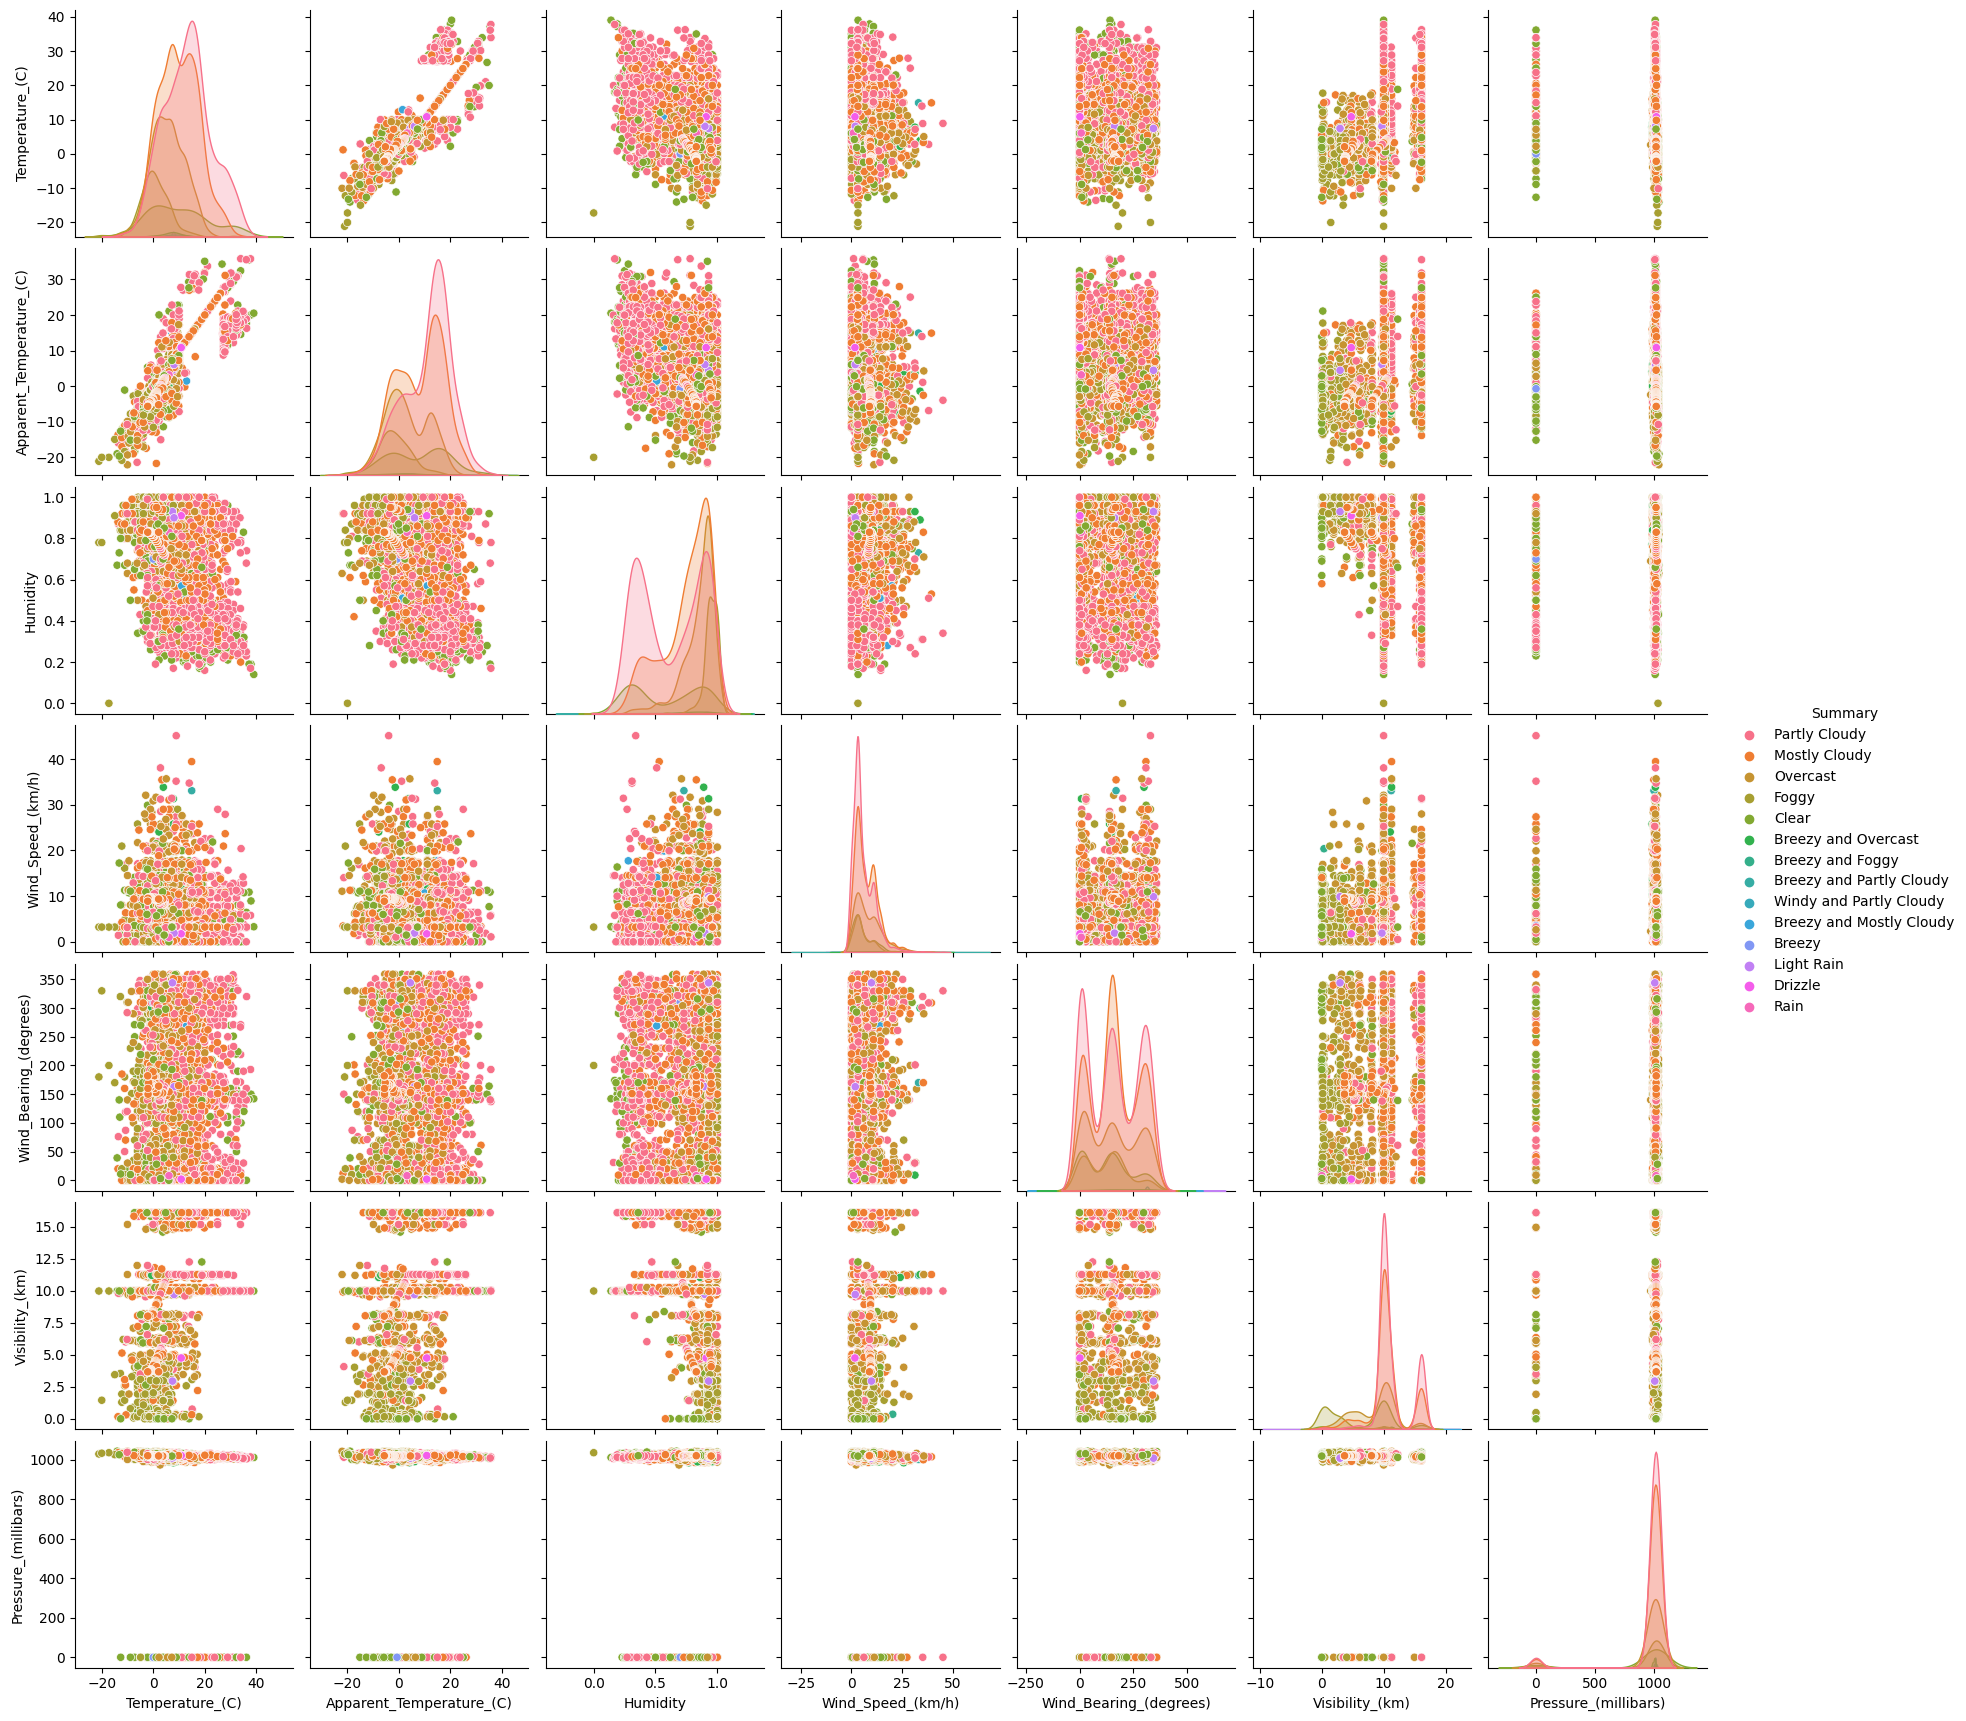

In [30]:
sns.pairplot(data, hue='Summary')

In [31]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['Precip_Type', 'Summary']] = encoder.fit_transform(data[['Precip_Type', 'Summary']])

In [32]:
data.corr(numeric_only=True).style.background_gradient(cmap='magma')

<Axes: >

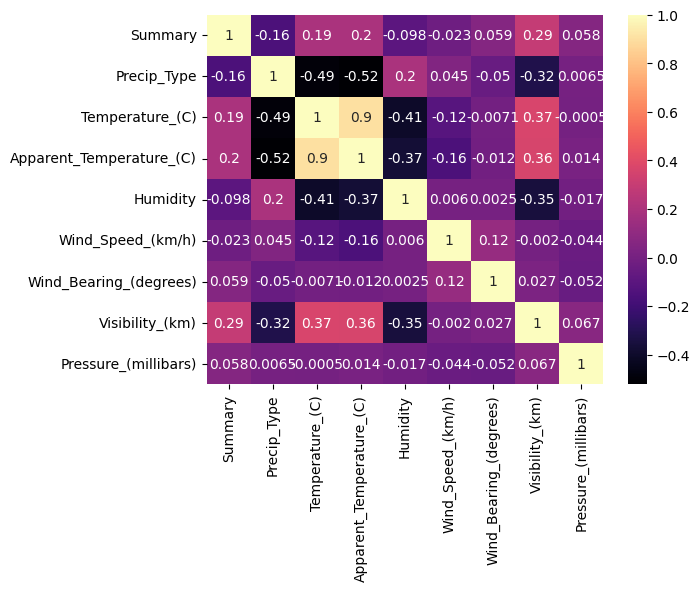

In [33]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='magma')

## __Feature Engineering__

### __Drop Unwanted Columns__

In [34]:
data.columns

Index(['Summary', 'Precip_Type', 'Temperature_(C)', 'Apparent_Temperature_(C)',
       'Humidity', 'Wind_Speed_(km/h)', 'Wind_Bearing_(degrees)',
       'Visibility_(km)', 'Pressure_(millibars)', 'Daily_Summary'],
      dtype='object')

In [35]:
data.drop(columns=['Temperature_(C)', 'Wind_Bearing_(degrees)', 'Pressure_(millibars)', 'Daily_Summary'], inplace=True)

### __Scale the data__

In [37]:
numcols = data.select_dtypes(include=np.number).columns

In [38]:
numcols

Index(['Summary', 'Precip_Type', 'Apparent_Temperature_(C)', 'Humidity',
       'Wind_Speed_(km/h)', 'Visibility_(km)'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
data[numcols] = scale.fit_transform(data[numcols])

In [43]:
data.head()

Summary  Precip_Type  Apparent_Temperature_(C)  \
Formatted_Date                                                               
2005-12-31 00:00:00+00:00  0.885438    -0.332918                 -1.187975   
2006-01-01 00:00:00+00:00 -0.241763    -0.332918                 -1.109112   
2006-01-02 00:00:00+00:00  0.321837    -0.332918                 -1.093340   
2006-01-03 00:00:00+00:00  0.321837    -0.332918                 -0.549747   
2006-01-04 00:00:00+00:00  0.321837    -0.332918                 -1.055035   

                           Humidity  Wind_Speed_(km/h)  Visibility_(km)  
Formatted_Date                                                           
2005-12-31 00:00:00+00:00  0.719792           1.853070         0.025752  
2006-01-01 00:00:00+00:00  0.593480           1.248370         0.004558  
2006-01-02 00:00:00+00:00  0.340855          -0.726793        -1.419739  
2006-01-03 00:00:00+00:00  0.719792          -0.845472        -0.080222  
2006-01-04 00:00:00+00:00  0.846104           1.901107         0.326720

### __Differencing the data__

In [44]:
def series_to_supervised(data, nlag_in=1, nlag_out=1, dropna=True):
        
        ncols = 1 if data is list() else data.shape[1]
        df = pd.DataFrame(data) 
        col_names, col_values = [], []
        
        # Create lagged input sequence data
        for i in range(nlag_in, 0, -1):
            col_values.append(data.shift(i))
            
            for j in range(ncols):
                col_names.append(f'col{j+i}(t-{i})')
                
        # Create forecast output sequence data
        for i in range(0, nlag_out):
            col_values.append(data.shift(-i))
            for j in range(ncols):
                if i==0:
                    col_names.append(f'col{j+1}(t)')
                else:
                    col_names.append(f'col{j+1}(t-{i})')
                    
        # Saving and converting the col_names and col_values into dataframe
        final_df = pd.concat(col_values, axis=1)
        final_df.columns = col_names
        
        # Drop the rows with missing values
        if dropna is True:
            final_df.dropna(inplace=True)
                
        return final_df

In [45]:
data = series_to_supervised(data)

In [46]:
data.head()

col1(t-1)  col2(t-1)  col3(t-1)  col4(t-1)  \
Formatted_Date                                                          
2006-01-01 00:00:00+00:00   0.885438  -0.332918  -1.187975   0.719792   
2006-01-02 00:00:00+00:00  -0.241763  -0.332918  -1.109112   0.593480   
2006-01-03 00:00:00+00:00   0.321837  -0.332918  -1.093340   0.340855   
2006-01-04 00:00:00+00:00   0.321837  -0.332918  -0.549747   0.719792   
2006-01-05 00:00:00+00:00   0.321837  -0.332918  -1.055035   0.846104   

                           col5(t-1)  col6(t-1)   col1(t)   col2(t)   col3(t)  \
Formatted_Date                                                                  
2006-01-01 00:00:00+00:00   1.853070   0.025752 -0.241763 -0.332918 -1.109112   
2006-01-02 00:00:00+00:00   1.248370   0.004558  0.321837 -0.332918 -1.093340   
2006-01-03 00:00:00+00:00  -0.726793  -1.419739  0.321837 -0.332918 -0.549747   
2006-01-04 00:00:00+00:00  -0.845472  -0.080222  0.321837 -0.332918 -1.055035   
2006-01-05 00:00:00+00:00   1.901107   0.326720  0.321837 -0.332918 -0.835345   

                            col4(t)   col5(t)   col6(t)  
Formatted_Date                                           
2006-01-01 00:00:00+00:00  0.593480  1.248370  0.004558  
2006-01-02 00:00:00+00:00  0.340855 -0.726793 -1.419739  
2006-01-03 00:00:00+00:00  0.719792 -0.845472 -0.080222  
2006-01-04 00:00:00+00:00  0.846104  1.901107  0.326720  
2006-01-05 00:00:00+00:00  0.846104 -0.678756 -1.496040

In [47]:
data.drop(data.iloc[:, 7:], axis=1, inplace=True)

## __Build the Model__

### Splitting into features and target

In [48]:
x = data.drop(columns='col1(t)').values
y = data['col1(t)'].values

### __Spllitting tha data into train and test__

In [49]:
365*9

3285

In [50]:
xtrain = x[:3285, :]
ytrain = y[:3285]
xtest = x[3285:, :]
ytest = y[3285:]

In [51]:
xtest.shape

(733, 6)

In [52]:
# reshape input to be 3D [samples, timesteps, features]

xtrain = xtrain.reshape(xtrain.shape[0], 1, xtrain.shape[1])
xtest = xtest.reshape(xtest.shape[0], 1, xtest.shape[1])

### __Building the neural networks__

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [76]:
model = Sequential()

model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(xtrain.shape[1], xtrain.shape[2])))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
          
model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 100)            42800     
                                                                 
 lstm_19 (LSTM)              (None, 50)                30200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 73,051
Trainable params: 73,051
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(xtrain, ytrain, epochs=100, batch_size=70, validation_data=(xtest, ytest), verbose=2, shuffle=False)

Epoch 1/100
47/47 - 1s - loss: 0.7665 - val_loss: 0.6617 - 1s/epoch - 25ms/step
Epoch 2/100
47/47 - 0s - loss: 0.7401 - val_loss: 0.6070 - 95ms/epoch - 2ms/step
Epoch 3/100
47/47 - 0s - loss: 0.7102 - val_loss: 0.5891 - 100ms/epoch - 2ms/step
Epoch 4/100
47/47 - 0s - loss: 0.7068 - val_loss: 0.5878 - 98ms/epoch - 2ms/step
Epoch 5/100
47/47 - 0s - loss: 0.7038 - val_loss: 0.5861 - 97ms/epoch - 2ms/step
Epoch 6/100
47/47 - 0s - loss: 0.7014 - val_loss: 0.5851 - 104ms/epoch - 2ms/step
Epoch 7/100
47/47 - 0s - loss: 0.6998 - val_loss: 0.5852 - 107ms/epoch - 2ms/step
Epoch 8/100
47/47 - 0s - loss: 0.6990 - val_loss: 0.5848 - 104ms/epoch - 2ms/step
Epoch 9/100
47/47 - 0s - loss: 0.6982 - val_loss: 0.5843 - 100ms/epoch - 2ms/step
Epoch 10/100
47/47 - 0s - loss: 0.6972 - val_loss: 0.5840 - 101ms/epoch - 2ms/step
Epoch 11/100
47/47 - 0s - loss: 0.6966 - val_loss: 0.5839 - 98ms/epoch - 2ms/step
Epoch 12/100
47/47 - 0s - loss: 0.6955 - val_loss: 0.5841 - 97ms/epoch - 2ms/step
Epoch 13/100
47/47 -